# Question 1B: Shooting Method

Given the second order differential equation function.

$$ \frac{d^2y}{dx^2} = f(x, y , \frac{dy}{dx} )$$
$$ \frac{d^2y}{dx^2} = y'' = 6x - \frac{1}{2}x^2 $$

The Boundary value problem:

$$ y(0) = 0, \ and \ y(12) = 0 $$

The step size $h=0.1$ the actual $y(x)$ is unknown, we wish to find $y(4)$.

We will make a guess of the value $y'(0) = 5$

We can then reduce the BVP to simultaneous 1st order equations. These we are IVPs, and we can use IVP methods like Euler's method.
$$
\begin{align*}
\frac{dy}{dx} &= z \\
&= f_1(x, y, z)     \qquad (1) \ (\ note \ this \ is \ just \ assumed) \\
\frac{dz}{dx} &= 6x - \frac{1}{2}x^2  \\
&= f_2(x,y,z) \qquad (2) \\
\end{align*}
$$


To solve we use an IVP method, we will use EUlers:

$$ y_{i+1} = y_i + f_1(x_i, y_i, z_i)h $$
$$ z_{i+1} = z_i + f_2(x_i, y_i, z_i)h $$




In [75]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [76]:
def myfun_f1(x,y,z):
    return (z)

def myfun_f2(x,y,z):
    return (6*x - 0.5*x**2)


## Discrete Interval 
Here we will use a step sizes on the  $ 0 \leq x \leq 12 $.
### Interval
The step Size will be $h_{1} = 0.1

with the discrete time steps,
$$ x_{i} = 0 + 0.1i $$
for  $i=0,1,...,120$.



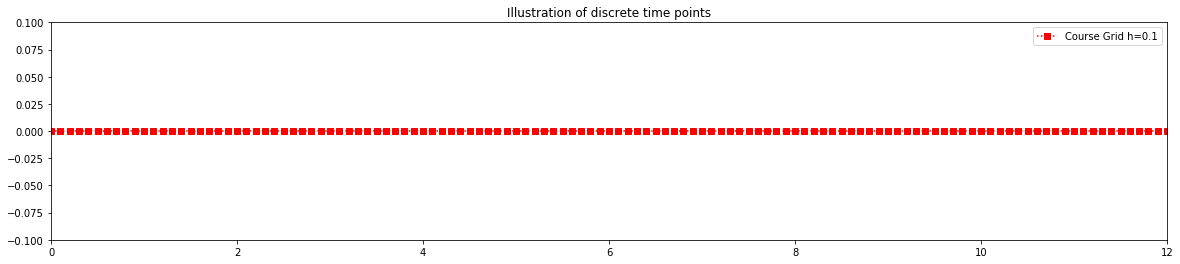

In [77]:
# Start and end of interval
b=12
a=0
# Steps N1=400
N1=120

h1=0.1

x1=np.arange(a,b+h1,h1)


fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Course Grid h=%s'%(h1))


plt.xlim((0,12))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

## Setting up the inital Conditions for our 1st guess
$$ w_{1} = 0 $$
$$ z_{1} = 5 $$

## Setting up the inital Conditions for our 2nd guess
$$ w_{2} = 0 $$
$$ z_{2} = -100 $$

In [78]:
## 1st Guess 

IC_W1=0 # Intial condtion
IC_Z1=5 # Intial condtion
w1 = np.zeros(N1+1)
z1 = np.zeros(N1+1)


w1[0]=IC_W1
z1[0]=IC_Z1

## 2nd Guess 

IC_W2=0 # Intial condtion
IC_Z2=-100 # Intial condtion
w2 = np.zeros(N1+1)
z2 = np.zeros(N1+1)


w2[0]=IC_W2
z2[0]=IC_Z2



## Euler Method

$$ w_{i+1} = w_{i} + hf_1(x_{i}, w_{i}, z_{i}) $$

$$ z_{i+1} = z_{i} + hf_2(x_{i}, w_{i}, z_{i}) $$





Text(0.5, 1.0, 'BVP Shooting Method 1st and 2nd Guesses (z=5,-100) solution')

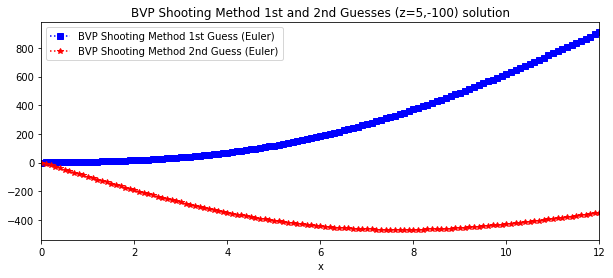

In [84]:

for i in range (0,N1):
    w1[i+1]=w1[i]+h1*myfun_f1(x1[i], w1[i], z1[i])
    z1[i+1]=z1[i]+h1*myfun_f2(x1[i], w1[i], z1[i])
    w2[i+1]=w2[i]+h1*myfun_f1(x1[i], w2[i], z2[i])
    z2[i+1]=z2[i]+h1*myfun_f2(x1[i], w2[i], z2[i])
    
    
    
fig = plt.figure(figsize=(10,4))
plt.plot(x1,w1,'s:',color='blue',label='BVP Shooting Method 1st Guess (Euler)')
plt.plot(x1,w2,'*:',color='red',label='BVP Shooting Method 2nd Guess (Euler)')


plt.xlim((0,12))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('BVP Shooting Method 1st and 2nd Guesses (z=5,-100) solution')



In [85]:
table = ListTable()
table.append(['x', 'w1', 'z1','w2', 'z2'
              ])
tableSize = 120
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(z1[i],5), round(w2[i],5), round(z2[i],5)])
    
table

x,w1,z1,w2,z2
0.0,0.0,5.0,0.0,-100.0
0.1,0.5,5.0,-10.0,-100.0
0.2,1.0,5.0595,-20.0,-99.9405
0.3,1.50595,5.1775,-29.99405,-99.8225
0.4,2.0237,5.353,-39.9763,-99.647
0.5,2.559,5.585,-49.941,-99.415
0.6,3.1175,5.8725,-59.8825,-99.1275
0.7,3.70475,6.2145,-69.79525,-98.7855
0.8,4.3262,6.61,-79.6738,-98.39
0.9,4.9872,7.058,-89.5128,-97.942


$y'(0)$ | $y_3 \approx y(12)$ | 
--- | --- |
$p_0$ | $q_0$ | 
$p_1$ | $q_1$ | 


Interpolating a more accurate value for $y'(0)$:

$$ p = p_0 + \frac{p_1-p_0}{q_1-q_0}(q-q_0) $$

In the example above we have:

$y'(0)$ | $y_3 \approx y(12)$ | 
--- | --- |
5 | 909.541 | 
-100 | -350.459 | 


Therefore:

$$ p = 5 + \frac{-100 -5}{-350.459-909.541}(q-909.541) $$

We want the value of p when $q=0$, therefore $p = -70.79508$

We now rerun through the IVP method with y(0) =0 and y'(0) = -70.79508 as the initial conditions.


In [81]:
## Best Guess
p = 5 + (z2[0]-z1[0])/(w2[N1]-w1[N1])*(-w1[N1])
print(p)

IC_W3=0 # Intial condtion
IC_Z3=p # Intial condtion
w3 = np.zeros(N1+1)
z3 = np.zeros(N1+1)

w3[0]=IC_W3
z3[0]=IC_Z3

-70.79508333333334


Text(0.5, 1.0, 'BVP Shooting Method Best Guess (z=-21.33) solution')

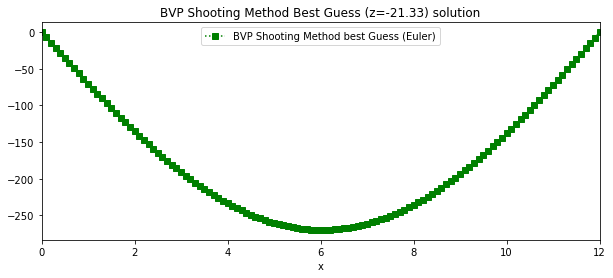

In [82]:
for i in range (0,N1):
    w3[i+1]=w3[i]+h1*myfun_f1(x1[i], w3[i], z3[i])
    z3[i+1]=z3[i]+h1*myfun_f2(x1[i], w3[i], z3[i])
    
    
    
    
fig = plt.figure(figsize=(10,4))
plt.plot(x1,w3,'s:',color='green',label='BVP Shooting Method best Guess (Euler)')



plt.xlim((0,12))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('BVP Shooting Method Best Guess (z=-21.33) solution')

In [83]:
table = ListTable()
table.append(['x', 'w1', 'z1','w2', 'z2', 'w3', 'z3'
              ])

table.append([round(x1[int(4/h1)],5), round(w1[int(4/h1)],5), round(z1[int(4/h1)],5), 
              round(w2[int(4/h1)],5), round(z2[int(4/h1)],5), 
                 round(w3[int(4/h1)],5), round(z3[int(4/h1)],5)])
table.append([round(x1[N1],5), round(w1[N1],5), round(z1[N1],5), round(w2[N1],5), round(z2[N1],5), 
                 round(w3[N1],5), round(z3[N1],5)])

"""
tableSize = 120
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(z1[i],5), round(w2[i],5), round(z2[i],5), 
                 round(w3[i],5), round(z3[i],5)])
"""
    
table

x,w1,z1,w2,z2,w3,z3
4.0,69.647,41.53,-350.353,-63.47,-233.53333,-34.26508
12.0,909.541,148.99,-350.459,43.99,-0.0,73.19492
